# PROBLEM ABSTRACT

Something about global population trends seems to send otherwise sensible people over the edge. According to the United Nations, the planet’s population is due to reach 8bn on November 15th. Alarm bells are clanging. Population pessimists have long predicted mass famine. Now they add prophecies of environmental disaster as a result of too many people. Others worry about the opposite problem: “population collapse due to low birth rates”, tweeted Elon Musk, the self-proclaimed “chief Twit”, “is a much bigger risk to civilisation than global warming.” In fact, looking at population change during the past decade suggests neither of these mutually contradictory divinations of doom will prove correct.


It took a dozen years (from 1998 to 2010) for the global population to grow from 6bn to 7bn. It has taken the same length of time to notch up the next billion. Against the backdrop of catastrophising, it is worth recalling what is behind this growth: longer lives, improvements in nutrition and public health; falls in infant mortality, disease and maternal deaths in childbirth


By 2080, the world’s population is expected to peak at 10.4 billion. Then there’s a 50% chance that the population will plateau or begin to decrease by 2100. More conservative models like the one published in 2020 in the Lancet anticipate the global population would be about 8.8 billion people by 2100.

# INTRODUCTION

Every major advance in agriculture has allowed global population to increase. Early farmers could settle down to a steady food supply. Irrigation, the ability to clear large swaths of land for farming efficiently, and the development of farm machines powered by fossil fuels allowed people to grow more food and transport it to where it was needed.

The flip side to this is that for the population to continue to grow, more advances in agriculture and an ever increasing supply of water will be needed. We’ve increased the carrying capacity for humans by our genius: growing crops, trading for needed materials, and designing ways to exploit resources that are difficult to get at, such as groundwater. And most of these resources are limited.

I want to research influence of agriculture on population growth .

For research data I am going to use data 'Total population 'from Data World bank . I am going to use data from WEB resource: https://databank.worldbank.org/reports.aspx?source=2&series=SP.POP.TOTL&country=#advancedDownloadOptions to get the data. World Data bank  helps developing countries find solutions to the toughest global and local development challenges—from adapting to climate change to boosting food security to increasing access to energy.

I`m going use data from the Food and Agriculture Organization of the United Nations (FAO) (downloadable files: https://data.world/agriculture/crop-production). 

Crops Primary, Fibre Crops Crop statistics are recorded for 173 products, covering the following categories: Crops Primary, Fibre Crops Primary, Cereals, Coarse Grain, Citrus Fruit, Fruit, Jute & Jute-like Fibres, Oilcakes Equivalent, Oil crops Primary, Pulses, Roots and Tubers, Treenuts and Vegetables and Melons. Data are expressed in terms of area harvested, production quantity, yield and seed quantity. The objective is to comprehensively cover production of all primary crops for all countries and regions in the world.

# RESEARCH APPROACH 



*The purpose of research to observe impact of agriculture on number of population.*


For the research we choose compare number of population from  2010 and 2020 years.

And results of crop production from 2009 and 2019 years , because the quality in the last year has impact on population in the current year.

As the first stage  I need to get  data from  "Population Total". For this operation I should provide the next steps:
1. Fecth data by WEB API: http://api.worldbank.org/v2/country/[ISO2]/indicator/SP.POP.TOTL?date=[year]


We choose data of population from 2010 and 2020 year for  analysis.
2. Process data to Pandas Dataframe format.
3. Provide Exploratory Data Analysis (EDA).

For the next step I will deal with dataset that provides information of Crop Production all over the wolrd:
1. Download (on Github)  and upload csv`s files. There are 5 files, that describe different regions.
2. Merge dataframes.(for the research purposes we are interested in general analysis ).
3. Delete useless columns(for example data of years except 2009 and 2019 are useless for us).
4. Develop ER(entity relationship).
5. Execute SQL queries to create tables in database  and upload data
6. Take data from database to pandas DataFrame format.
7. Execute EDA.

Then I am going to make general exploratory data analysis of agriculture dataset to understand how our data is distributed. 

After data analysis we can go to data preparation stage.
We will include feauture engineerig and data transformation operation. After this stage we are going to provide 'Prepped Data Review'.

Investigative Analysis & Results:


In this chapter we are going to build Linear Regression to predict percent change population.
We will train our model  on percent changes of agriculture types in countries and population percent change as target value.

After Linear Regression fitting I am going test model on test dataset and  

evaluate results by metrics.

Afrter all this step we are going to make a conclusion.

IMPORT IMPORTANT LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# EXPLORATORY DATA ANAYSUS (EDA)

## EDA of 'Total population' dataset

We should have our dataset from World Data Bank 'Total population' in csv or database to start EDA. 

We can FETCH API from resource: http://api.worldbank.org/v2/country/[ISO2]/indicator/SP.POP.TOTL?date=[year].

Where date parameter is year and  iSO2 - is a code of country.

To fecth data we should import next libraries that represented below:


*   requests - execution WEB requests
*   pandas   - to deal with data frames





From the next resource we will get iSO2 codes of countries:
https://raw.githubusercontent.com/lukes/ISO-3166-Countries-with-Regional-Codes/master/all/all.csv

In [ ]:
iso2=pd.read_csv('https://raw.githubusercontent.com/lukes/ISO-3166-Countries-with-Regional-Codes/master/all/all.csv')['alpha-2'].values

In [ ]:
iso2=list(map(lambda x: str(x).lower(),list(iso2)))
print(iso2)

['af', 'ax', 'al', 'dz', 'as', 'ad', 'ao', 'ai', 'aq', 'ag', 'ar', 'am', 'aw', 'au', 'at', 'az', 'bs', 'bh', 'bd', 'bb', 'by', 'be', 'bz', 'bj', 'bm', 'bt', 'bo', 'bq', 'ba', 'bw', 'bv', 'br', 'io', 'bn', 'bg', 'bf', 'bi', 'cv', 'kh', 'cm', 'ca', 'ky', 'cf', 'td', 'cl', 'cn', 'cx', 'cc', 'co', 'km', 'cg', 'cd', 'ck', 'cr', 'ci', 'hr', 'cu', 'cw', 'cy', 'cz', 'dk', 'dj', 'dm', 'do', 'ec', 'eg', 'sv', 'gq', 'er', 'ee', 'sz', 'et', 'fk', 'fo', 'fj', 'fi', 'fr', 'gf', 'pf', 'tf', 'ga', 'gm', 'ge', 'de', 'gh', 'gi', 'gr', 'gl', 'gd', 'gp', 'gu', 'gt', 'gg', 'gn', 'gw', 'gy', 'ht', 'hm', 'va', 'hn', 'hk', 'hu', 'is', 'in', 'id', 'ir', 'iq', 'ie', 'im', 'il', 'it', 'jm', 'jp', 'je', 'jo', 'kz', 'ke', 'ki', 'kp', 'kr', 'kw', 'kg', 'la', 'lv', 'lb', 'ls', 'lr', 'ly', 'li', 'lt', 'lu', 'mo', 'mg', 'mw', 'my', 'mv', 'ml', 'mt', 'mh', 'mq', 'mr', 'mu', 'yt', 'mx', 'fm', 'md', 'mc', 'mn', 'me', 'ms', 'ma', 'mz', 'mm', 'nan', 'nr', 'np', 'nl', 'nc', 'nz', 'ni', 'ne', 'ng', 'nu', 'nf', 'mk', 'mp', 'n

Creation of dataframe where we will provide information of population in 2010 and 2020 years.

In [ ]:
df_population=pd.DataFrame(columns=['country','2010_population','2020_population'])

In [ ]:
df_population

,country,2010_population,2020_population


FETCH API from resource: http://api.worldbank.org/v2/country/[ISO2]/indicator/SP.POP.TOTL?date=[year]

For this we are going to use request library

In [ ]:
import requests

In [ ]:

error_dict=[{'message': [{'id': '120', 'key': 'Invalid value', 'value': 'The provided parameter value is not valid'}]}]
none_dict=[{'page': 0, 'pages': 0, 'per_page': 0, 'total': 0, 'sourceid': None, 'sourcename': None, 'lastupdated': None}, None]

for i,code in   enumerate(iso2):
  info2010=requests.get(f'http://api.worldbank.org/v2/country/{code}/indicator/SP.POP.TOTL?date=2010&format=json')
  #extract country
  if info2010.json()==error_dict or info2010.json()==none_dict:
      continue


  country=info2010.json()[1][0]['country']['value'].lower()
  #extract population number of 2010 year
  pop2010=info2010.json()[1][0]['value']

  info2020=requests.get(f'http://api.worldbank.org/v2/country/{code}/indicator/SP.POP.TOTL?date=2020&format=json')
  #extract population number of 2020 year
  pop2020=info2020.json()[1][0]['value']

  df_population=df_population.append({'country':country,'2010_population':pop2010,'2020_population':pop2020},ignore_index=True)

Our data set provides the next use cases:


contry - name of country - categorical ordinal, string.

2010_population - number of population in 2010 year  - floating point numeric, float.

2020_population - number of population in 2020 year  - floating point numeric, float.

VIEW DATASET WITH POPULATION BY COUNTRIES

In [ ]:
df_population.head()

,country,2010_population,2020_population
0,afghanistan,29185511,38928341
1,albania,2913021,2837849
2,algeria,35977451,43851043
3,american samoa,56084,55197
4,andorra,84454,77265


In [ ]:
df_population.tail()

,country,2010_population,2020_population
209,british virgin islands,27796,30237
210,virgin islands (u.s.),108357,106290
211,"yemen, rep.",23154854,29825968
212,zambia,13605986,18383956
213,zimbabwe,12697728,14862927


CONVERT COLUMNS TO NUMERIC VALUES

In [ ]:
df_population['2010_population']=pd.to_numeric(df_population['2010_population'])
df_population['2020_population']=pd.to_numeric(df_population['2020_population'])

EXPLORATORY DATA ANALYSIS OF THE DATASET THAT WE EXTRACTED BY API

ANALYSIS OF ATTRIBUTE '2010_population'

In [ ]:
df_population['2010_population'].describe()

count    2.140000e+02
mean     3.221805e+07
std      1.286701e+08
min      1.000900e+04
25%      7.046295e+05
50%      6.190772e+06
75%      2.099697e+07
max      1.337705e+09
Name: 2010_population, dtype: float64

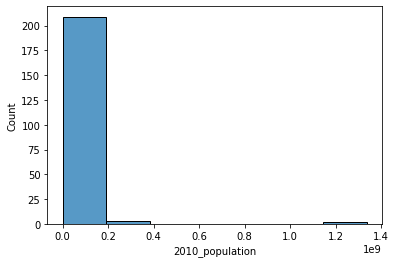

In [ ]:
sns.histplot(data=df_population,x='2010_population',bins=7)

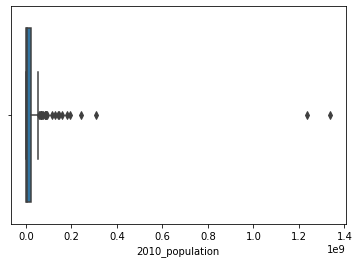

In [ ]:
sns.boxplot(data=df_population,x='2010_population')

Most of our contries in 2010 that we had  dataset on our dataset population between
0.1*1e9 and 0.2*1e9.


We have a little amount of countries with population bigger than  0.2*1e9 in 2010 year.

ANALYSIS OF ATTRIBUTE '2020_population'

In [ ]:
df_population['2020_population'].describe()

count    2.130000e+02
mean     3.630187e+07
std      1.402502e+08
min      1.083400e+04
25%      7.865590e+05
50%      6.871287e+06
75%      2.577882e+07
max      1.411100e+09
Name: 2020_population, dtype: float64

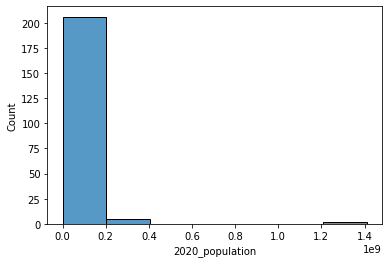

In [ ]:
sns.histplot(data=df_population,x='2020_population',bins=7)

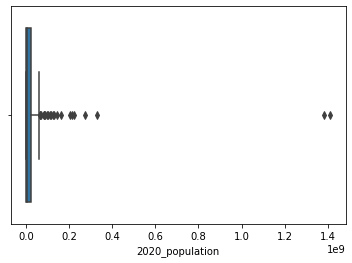

In [ ]:
sns.boxplot(data=df_population,x='2020_population')

As we can 10 years from 2010 we have more of countries in interval between   0.2*1e9 and 0,4*1e9.

And after 10 years countries with  the biggest number population have number more than 1.2 * 1e9 ( in 2010 they had less).

As we can see contries  had  big population have potential to increase this in several years.

## EDA of 'Corp Production' dataset






UPLOAD  CVS` FILES FROM GITHUB

UPLOAD AFRICAS CROPS PRODUCTION

In [3]:
df_afr=pd.read_csv('https://raw.githubusercontent.com/Gokhman07/AIM-5001/master/Production_Crops_E_Africa.csv', encoding = "ISO-8859-1")

In [4]:
df_afr.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y1961,Y1961F,Y1962,...,Y2015,Y2015F,Y2016,Y2016F,Y2017,Y2017F,Y2018,Y2018F,Y2019,Y2019F
0,4,Algeria,221,"Almonds, with shell",5312,Area harvested,ha,13300.0,F,13300.0,...,40403.0,NaN,49983.0,NaN,50100.0,NaN,43043.0,NaN,35380.0,NaN
1,4,Algeria,221,"Almonds, with shell",5419,Yield,hg/ha,4511.0,Fc,4511.0,...,18930.0,Fc,13223.0,Fc,12362.0,Fc,13292.0,Fc,20467.0,Fc
2,4,Algeria,221,"Almonds, with shell",5510,Production,tonnes,6000.0,NaN,6000.0,...,76482.0,NaN,66095.0,NaN,61934.0,NaN,57213.0,NaN,72412.0,NaN
3,4,Algeria,515,Apples,5312,Area harvested,ha,3400.0,F,3100.0,...,41011.0,NaN,46070.0,NaN,44620.0,NaN,39034.0,NaN,32989.0,NaN
4,4,Algeria,515,Apples,5419,Yield,hg/ha,45294.0,Fc,45161.0,...,110086.0,Fc,108716.0,Fc,110766.0,Fc,124970.0,Fc,169399.0,Fc


UPLOAD AMERICAS CROPS PRODUCTION

In [ ]:
df_amr=pd.read_csv('https://raw.githubusercontent.com/Gokhman07/AIM-5001/master/Production_Crops_E_Americas.csv',encoding = "ISO-8859-1")
df_amr.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y1961,Y1961F,Y1962,...,Y2015,Y2015F,Y2016,Y2016F,Y2017,Y2017F,Y2018,Y2018F,Y2019,Y2019F
0,8,Antigua and Barbuda,486,Bananas,5312,Area harvested,ha,NaN,NaN,NaN,...,37.0,Im,40.0,Im,42.0,Im,45.0,Im,49.0,Im
1,8,Antigua and Barbuda,486,Bananas,5419,Yield,hg/ha,NaN,NaN,NaN,...,71081.0,Fc,66250.0,Fc,64048.0,Fc,60667.0,Fc,56327.0,Fc
2,8,Antigua and Barbuda,486,Bananas,5510,Production,tonnes,NaN,NaN,NaN,...,263.0,Im,265.0,Im,269.0,Im,273.0,Im,276.0,Im
3,8,Antigua and Barbuda,414,"Beans, green",5312,Area harvested,ha,1.0,F,1.0,...,25.0,Im,25.0,Im,25.0,Im,25.0,Im,25.0,Im
4,8,Antigua and Barbuda,414,"Beans, green",5419,Yield,hg/ha,40000.0,Fc,40000.0,...,40400.0,Fc,40000.0,Fc,40400.0,Fc,40400.0,Fc,40800.0,Fc


UPLOAD ASIAS CROPS PRODUCTION

In [ ]:
df_asia=pd.read_csv('https://raw.githubusercontent.com/Gokhman07/AIM-5001/master/Production_Crops_E_Asia.csv',encoding = "ISO-8859-1")
df_asia.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y1961,Y1961F,Y1962,...,Y2015,Y2015F,Y2016,Y2016F,Y2017,Y2017F,Y2018,Y2018F,Y2019,Y2019F
0,2,Afghanistan,221,"Almonds, with shell",5312,Area harvested,ha,NaN,NaN,NaN,...,14676.0,NaN,19481.0,NaN,19793.0,NaN,20053.0,NaN,29203.0,NaN
1,2,Afghanistan,221,"Almonds, with shell",5419,Yield,hg/ha,NaN,NaN,NaN,...,16521.0,Fc,16859.0,Fc,13788.0,Fc,17161.0,Fc,13083.0,Fc
2,2,Afghanistan,221,"Almonds, with shell",5510,Production,tonnes,NaN,NaN,NaN,...,24246.0,NaN,32843.0,NaN,27291.0,NaN,34413.0,NaN,38205.0,NaN
3,2,Afghanistan,711,"Anise, badian, fennel, coriander",5312,Area harvested,ha,NaN,M,NaN,...,25000.0,F,25787.0,Im,28398.0,Im,26725.0,Im,27562.0,Im
4,2,Afghanistan,711,"Anise, badian, fennel, coriander",5419,Yield,hg/ha,NaN,NaN,NaN,...,7200.0,Fc,6982.0,Fc,6863.0,Fc,6898.0,Fc,6903.0,Fc


UPLOAD EUROPES CROPS PRODUCTION

In [ ]:
df_euro=pd.read_csv('https://raw.githubusercontent.com/Gokhman07/AIM-5001/master/Production_Crops_E_Europe.csv',encoding = "ISO-8859-1")
df_euro.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y1961,Y1961F,Y1962,...,Y2015,Y2015F,Y2016,Y2016F,Y2017,Y2017F,Y2018,Y2018F,Y2019,Y2019F
0,3,Albania,515,Apples,5312,Area harvested,ha,NaN,M,NaN,...,4008.0,NaN,4230.0,NaN,4346.0,NaN,4294.0,NaN,4407.0,NaN
1,3,Albania,515,Apples,5419,Yield,hg/ha,NaN,NaN,NaN,...,228882.0,Fc,240028.0,Fc,221671.0,Fc,252387.0,Fc,240374.0,Fc
2,3,Albania,515,Apples,5510,Production,tonnes,10004.0,NaN,8039.0,...,91736.0,NaN,101532.0,NaN,96338.0,NaN,108375.0,NaN,105933.0,NaN
3,3,Albania,526,Apricots,5312,Area harvested,ha,NaN,M,NaN,...,331.0,NaN,326.0,NaN,326.0,NaN,337.0,NaN,341.0,NaN
4,3,Albania,526,Apricots,5419,Yield,hg/ha,NaN,NaN,NaN,...,152417.0,Fc,159325.0,Fc,154601.0,Fc,152493.0,Fc,142962.0,Fc


UPLOAD OCEANIA CROPS PRODUCTION

In [ ]:
df_ocea=pd.read_csv('https://raw.githubusercontent.com/Gokhman07/AIM-5001/master/Production_Crops_E_Oceania.csv',encoding = "ISO-8859-1")
df_ocea.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y1961,Y1961F,Y1962,...,Y2015,Y2015F,Y2016,Y2016F,Y2017,Y2017F,Y2018,Y2018F,Y2019,Y2019F
0,10,Australia,221,"Almonds, with shell",5312,Area harvested,ha,NaN,M,NaN,...,28190.0,NaN,28553.0,NaN,29282.0,NaN,31361.0,NaN,37903.0,NaN
1,10,Australia,221,"Almonds, with shell",5419,Yield,hg/ha,NaN,NaN,NaN,...,45221.0,Fc,42050.0,Fc,40909.0,Fc,39769.0,Fc,38628.0,Fc
2,10,Australia,221,"Almonds, with shell",5510,Production,tonnes,NaN,M,NaN,...,127479.0,Im,120065.0,Im,119790.0,Im,124718.0,Im,146410.0,Im
3,10,Australia,711,"Anise, badian, fennel, coriander",5312,Area harvested,ha,NaN,M,NaN,...,989.0,Im,1083.0,Im,1108.0,Im,1145.0,Im,1182.0,Im
4,10,Australia,711,"Anise, badian, fennel, coriander",5419,Yield,hg/ha,NaN,NaN,NaN,...,11608.0,Fc,11625.0,Fc,11661.0,Fc,11712.0,Fc,11751.0,Fc


DATAFRAME MERGE

WE ARE GOING TO  EXECUTE THIS OPERATION USING IN-BUILT 'CONCAT' FUNCTION

In [ ]:
frames=[df_afr,df_amr,df_asia,df_euro,df_ocea]

In [ ]:
df_crops = pd.concat(frames,ignore_index=True)

In dataframe we have 38146 rows

In [ ]:
len(df_crops)

38146

In [ ]:
df_crops.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y1961,Y1961F,Y1962,...,Y2015,Y2015F,Y2016,Y2016F,Y2017,Y2017F,Y2018,Y2018F,Y2019,Y2019F
0,4,Algeria,221,"Almonds, with shell",5312,Area harvested,ha,13300.0,F,13300.0,...,40403.0,NaN,49983.0,NaN,50100.0,NaN,43043.0,NaN,35380.0,NaN
1,4,Algeria,221,"Almonds, with shell",5419,Yield,hg/ha,4511.0,Fc,4511.0,...,18930.0,Fc,13223.0,Fc,12362.0,Fc,13292.0,Fc,20467.0,Fc
2,4,Algeria,221,"Almonds, with shell",5510,Production,tonnes,6000.0,NaN,6000.0,...,76482.0,NaN,66095.0,NaN,61934.0,NaN,57213.0,NaN,72412.0,NaN
3,4,Algeria,515,Apples,5312,Area harvested,ha,3400.0,F,3100.0,...,41011.0,NaN,46070.0,NaN,44620.0,NaN,39034.0,NaN,32989.0,NaN
4,4,Algeria,515,Apples,5419,Yield,hg/ha,45294.0,Fc,45161.0,...,110086.0,Fc,108716.0,Fc,110766.0,Fc,124970.0,Fc,169399.0,Fc


In [ ]:
df_crops.tail()

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y1961,Y1961F,Y1962,...,Y2015,Y2015F,Y2016,Y2016F,Y2017,Y2017F,Y2018,Y2018F,Y2019,Y2019F
38141,155,Vanuatu,1720,"Roots and Tubers, Total",5419,Yield,hg/ha,225455.0,Fc,227273.0,...,82467.0,Fc,82306.0,Fc,82341.0,Fc,82374.0,Fc,82407.0,Fc
38142,155,Vanuatu,1720,"Roots and Tubers, Total",5510,Production,tonnes,24800.0,A,25000.0,...,52251.0,A,52314.0,A,52838.0,A,53362.0,A,53886.0,A
38143,155,Vanuatu,1735,Vegetables Primary,5312,Area harvested,ha,200.0,A,210.0,...,801.0,A,804.0,A,810.0,A,817.0,A,824.0,A
38144,155,Vanuatu,1735,Vegetables Primary,5419,Yield,hg/ha,150000.0,Fc,150000.0,...,164819.0,Fc,165547.0,Fc,166358.0,Fc,166952.0,Fc,167524.0,Fc
38145,155,Vanuatu,1735,Vegetables Primary,5510,Production,tonnes,3000.0,A,3150.0,...,13202.0,A,13310.0,A,13475.0,A,13640.0,A,13804.0,A


DELETE USELESS COLUMNS

FOR THE NEXT RESEARCH STEPS WE NEED ONLY  THE NEXT COLUMNS:

* '''AREA'- country name
* 'Item', 'Item Code' - describes agriculture typ
*  from year columns - we need only information about 2009 and 2019, that had impact on 2010 and 2020 years
* we only need rows are related to 'Production' category

DELETE INFORMATION FROM 1961 year until 2009

In [ ]:
df_crops.drop(df_crops.columns[7:103],axis=1,inplace=True)

In [ ]:
df_crops.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y2009,Y2009F,Y2010,...,Y2015,Y2015F,Y2016,Y2016F,Y2017,Y2017F,Y2018,Y2018F,Y2019,Y2019F
0,4,Algeria,221,"Almonds, with shell",5312,Area harvested,ha,39313.0,NaN,54485.0,...,40403.0,NaN,49983.0,NaN,50100.0,NaN,43043.0,NaN,35380.0,NaN
1,4,Algeria,221,"Almonds, with shell",5419,Yield,hg/ha,12055.0,Fc,10457.0,...,18930.0,Fc,13223.0,Fc,12362.0,Fc,13292.0,Fc,20467.0,Fc
2,4,Algeria,221,"Almonds, with shell",5510,Production,tonnes,47393.0,NaN,56973.0,...,76482.0,NaN,66095.0,NaN,61934.0,NaN,57213.0,NaN,72412.0,NaN
3,4,Algeria,515,Apples,5312,Area harvested,ha,36616.0,NaN,52419.0,...,41011.0,NaN,46070.0,NaN,44620.0,NaN,39034.0,NaN,32989.0,NaN
4,4,Algeria,515,Apples,5419,Yield,hg/ha,73047.0,Fc,72233.0,...,110086.0,Fc,108716.0,Fc,110766.0,Fc,124970.0,Fc,169399.0,Fc


DELETE INFORMATION 2009 and 2019 YEAR

In [ ]:
df_crops.drop(df_crops.columns[8:27],axis=1,inplace=True)
del df_crops['Y2019F']

In [ ]:
df_crops.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y2009,Y2019
0,4,Algeria,221,"Almonds, with shell",5312,Area harvested,ha,39313.0,35380.0
1,4,Algeria,221,"Almonds, with shell",5419,Yield,hg/ha,12055.0,20467.0
2,4,Algeria,221,"Almonds, with shell",5510,Production,tonnes,47393.0,72412.0
3,4,Algeria,515,Apples,5312,Area harvested,ha,36616.0,32989.0
4,4,Algeria,515,Apples,5419,Yield,hg/ha,73047.0,169399.0


EXTRACTION ONLY 'PRODUCTION' ROWS

In [ ]:
len(df_crops)

38146

In [ ]:
df_crops=df_crops.drop(df_crops[df_crops['Element']!='Production'].index)
df_crops

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y2009,Y2019
2,4,Algeria,221,"Almonds, with shell",5510,Production,tonnes,47393.0,72412.0
5,4,Algeria,515,Apples,5510,Production,tonnes,267469.0,558830.0
8,4,Algeria,526,Apricots,5510,Production,tonnes,202876.0,209204.0
11,4,Algeria,366,Artichokes,5510,Production,tonnes,39535.0,119636.0
14,4,Algeria,486,Bananas,5510,Production,tonnes,167.0,159.0
...,...,...,...,...,...,...,...,...,...
38133,155,Vanuatu,1731,Oilcrops,5510,Production,tonnes,257550.0,305156.0
38136,155,Vanuatu,1841,"Oilcrops, Cake Equivalent",5510,Production,tonnes,21369.0,25200.0
38139,155,Vanuatu,1732,"Oilcrops, Oil Equivalent",5510,Production,tonnes,33915.0,40116.0
38142,155,Vanuatu,1720,"Roots and Tubers, Total",5510,Production,tonnes,46000.0,53886.0


As result we got dataframe of size 13224 rows × 9 columns.


And we can delete the columns 'Element' and 'Element Code'.

In [ ]:
del df_crops['Element']
del df_crops['Element Code']

In [ ]:
df_crops.head()

,Area Code,Area,Item Code,Item,Unit,Y2009,Y2019
2,4,Algeria,221,"Almonds, with shell",tonnes,47393.0,72412.0
5,4,Algeria,515,Apples,tonnes,267469.0,558830.0
8,4,Algeria,526,Apricots,tonnes,202876.0,209204.0
11,4,Algeria,366,Artichokes,tonnes,39535.0,119636.0
14,4,Algeria,486,Bananas,tonnes,167.0,159.0


The we gonna make analysis  attribute 'Unit'

In [ ]:
df_crops['Unit'].unique()

array(['tonnes'], dtype=object)

As we can see column 'Unit' provides only value 'tonnes', that means we do not have to make any convertion with amount of production, hence we can delete the column 'Unit'.

In [ ]:
del df_crops['Unit']
df_crops.head()

,Area Code,Area,Item Code,Item,Y2009,Y2019
2,4,Algeria,221,"Almonds, with shell",47393.0,72412.0
5,4,Algeria,515,Apples,267469.0,558830.0
8,4,Algeria,526,Apricots,202876.0,209204.0
11,4,Algeria,366,Artichokes,39535.0,119636.0
14,4,Algeria,486,Bananas,167.0,159.0


In [ ]:
df_crops.tail()

,Area Code,Area,Item Code,Item,Y2009,Y2019
38133,155,Vanuatu,1731,Oilcrops,257550.0,305156.0
38136,155,Vanuatu,1841,"Oilcrops, Cake Equivalent",21369.0,25200.0
38139,155,Vanuatu,1732,"Oilcrops, Oil Equivalent",33915.0,40116.0
38142,155,Vanuatu,1720,"Roots and Tubers, Total",46000.0,53886.0
38145,155,Vanuatu,1735,Vegetables Primary,11895.0,13804.0


ER DIAGRAM FOR PostgreSQL

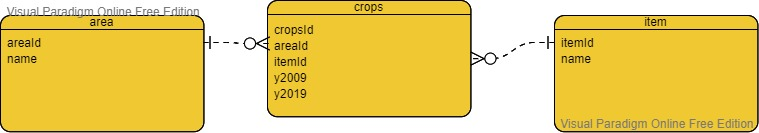

As we can see from this diagram we will have three tables.

Table 'area' contains information of all area from dataset.

Table 'item' contains information of all agricultures from dataset.

Table 'crops' contains information of crops in different countries in 2009 and 2019 years.



---
Entity 'area'



*   areaId - identifier of area
*   name   -  name of area


Entity 'item'



*   itemId - identifier of agriculture type
*   name   -  title of agriculture type


Entity 'crops'



*   cropsId - identifier of cropsId obesrvation
*   areaId - identifier of area
*   itemId - identifier of agriculture type
*   y2009  - amount of crops in 2009
*   y2019  - amount of crops in 2019

We  need to make next changes with our dataset to upload in database.

In [ ]:
df_crops_copy=df_crops.copy()

Extract inoformation for table 'area'.

In [ ]:
df_area=df_crops_copy[['Area Code',	'Area']].drop_duplicates()
df_area['Area']=df_area['Area'].apply(lambda x: x.lower())
df_area.head()

,Area Code,Area
2,4,algeria
224,7,angola
356,53,benin
517,20,botswana
611,233,burkina faso


Delete area titles from general dataset.

In [ ]:
del df_crops_copy['Area']

We should provide the same operation for columns that relate to agriculture type.

In [ ]:
df_item=df_crops_copy[['Item Code',	'Item']].drop_duplicates()
df_item['Item']=df_item['Item'].apply(lambda x: x.lower())
df_item.head()

,Item Code,Item
2,221,"almonds, with shell"
5,515,apples
8,526,apricots
11,366,artichokes
14,486,bananas


Delete item titles from general dataset.

In [ ]:
del df_crops_copy['Item']

GENERAL DATASET

In [ ]:
df_crops_copy.head()

,Area Code,Item Code,Y2009,Y2019
2,4,221,47393.0,72412.0
5,4,515,267469.0,558830.0
8,4,526,202876.0,209204.0
11,4,366,39535.0,119636.0
14,4,486,167.0,159.0




---


SQL statements that created database and tables within PostgreSQL.

SQL statement for creating "area" table - entity "area":


```
CREATE TABLE area (
 areaId serial PRIMARY KEY,
 name VARCHAR(100) UNIQUE NOT NULL
);

```


SQL statement for creating "item" table - entity "item":


```
CREATE TABLE item (
 itemId serial PRIMARY KEY,
 name VARCHAR(100) UNIQUE NOT NULL
);

```



SQL statement for creating "crops" table - entity "crops":



```
CREATE TABLE  crops (
 cropsid serial PRIMARY KEY,
 areaid int NOT NULL,
 itemid int NOT NULL,
  y2009 DECIMAL,
  y2019 DECIMAL,
  CONSTRAINT fk_area FOREIGN KEY (areaId)
 REFERENCES area(areaid),
  CONSTRAINT fk_item FOREIGN KEY (itemId)
 REFERENCES item(itemId)
 
 
);
```




 DATABASE STRUCTURE AFTER EXECUTION OF SQL STATEMENTS(GENERATED BY pgAdmin)

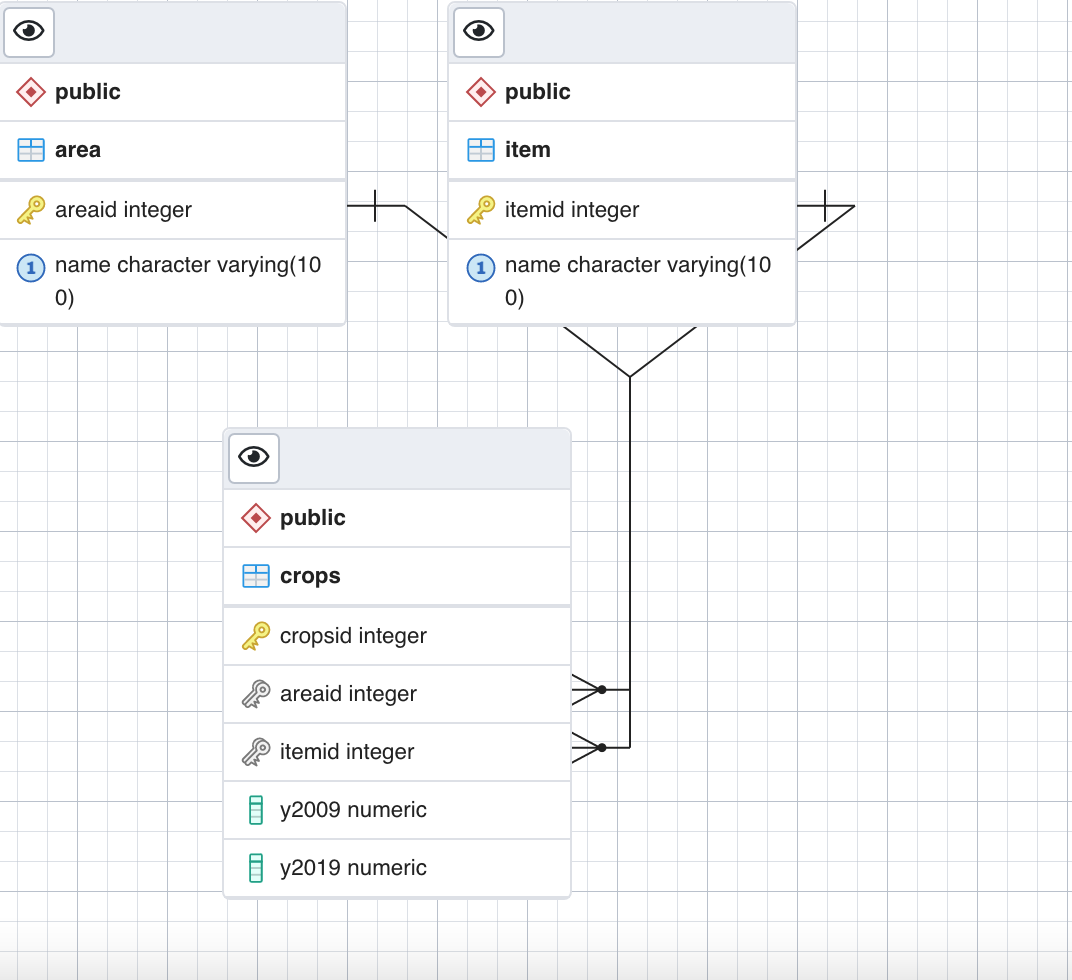



---

AS THE NEXT STEP WE ARE GOING TO INSERT DATA IN DATABASE

IMPORT LIBRARY TO INTERACT WITH PostgreSQL database



In [ ]:
import psycopg2

In [ ]:
conn=psycopg2.connect("host=localhost dbname=crops user=postgres password=printer10")

In [ ]:
cur=conn.cursor()



---


INSERT AREA INFORMATION INTO DATABASE

In [ ]:
for i in range(len(df_area)):
  code=df_area['Area Code'][i]
  area=df_area['Area'][i].replace("'","`")
  cur.execute(f"INSERT INTO area(\"areaid\",\"name\") VALUES ({code} , '{area}')")
  conn.commit()

RESULT AFTER EXECUTION

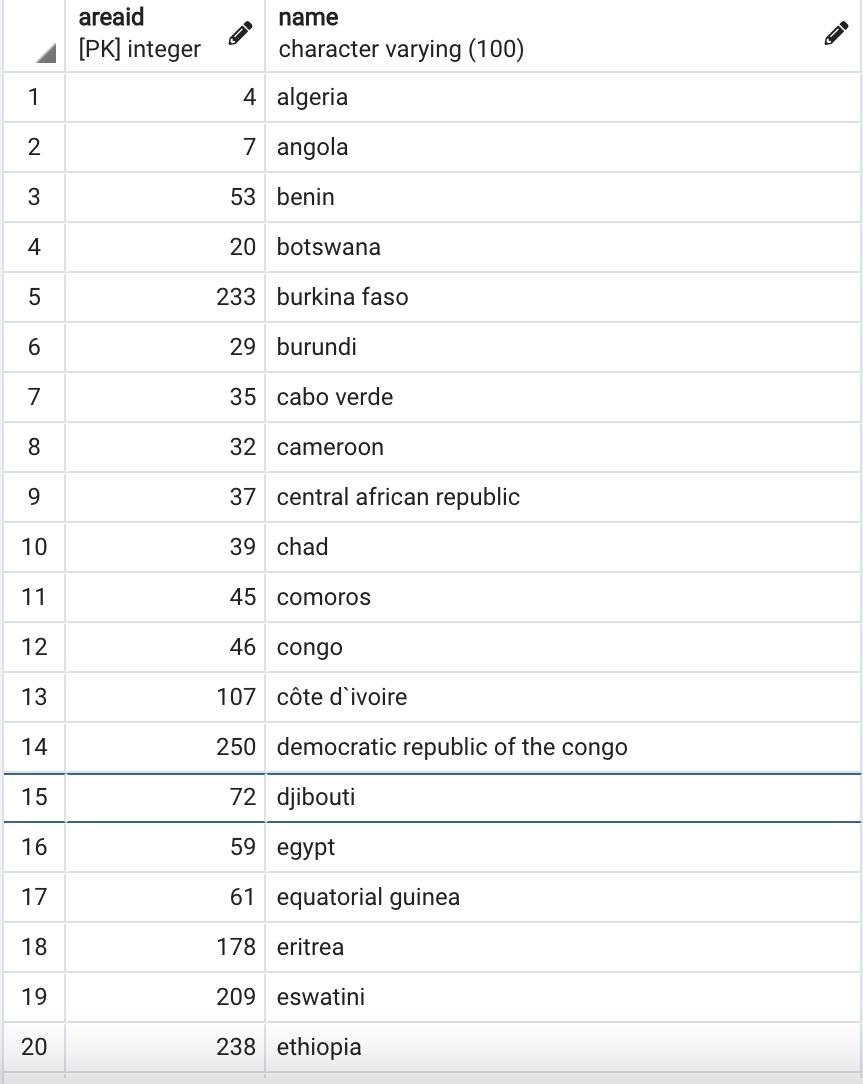



---


INSERT ITEM INFORMATION INTO DATABASE

In [ ]:
for i in range(len(df_item)):
  code=df_item['Item Code'][i]
  item=df_item['Item'][i].replace("'","`")
  cur.execute(f"INSERT INTO item(\"itemid\",\"name\") VALUES ({code} , '{item}')")
  conn.commit()

RESULT AFTER EXECUTION

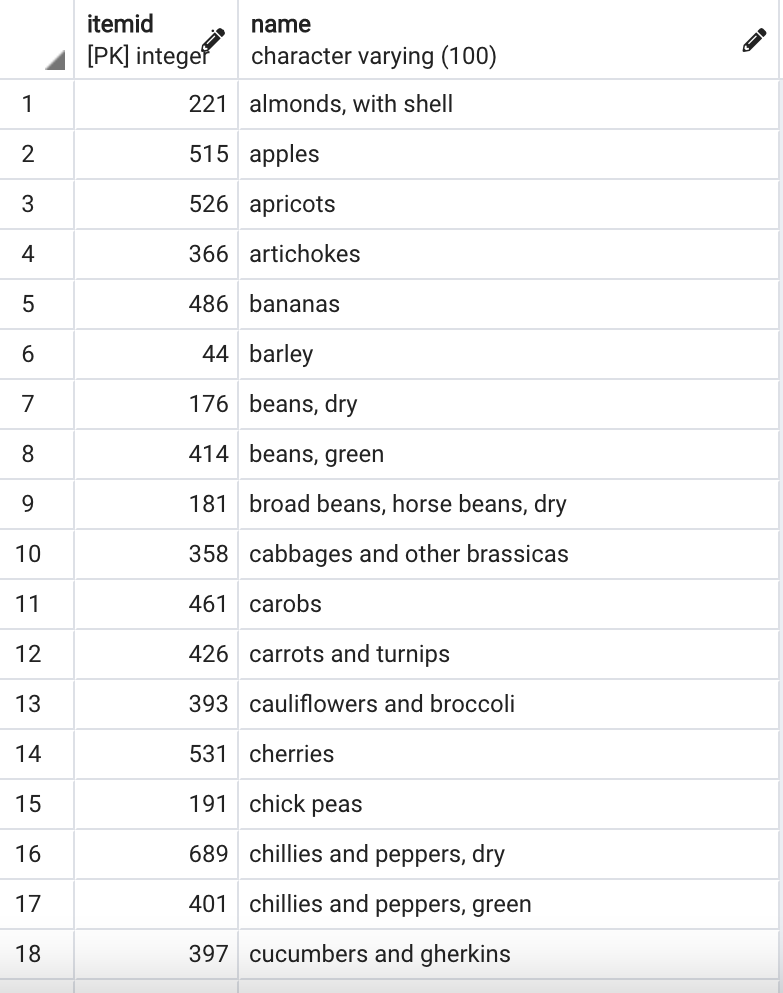



---
INSERT CROPS INFORMATION INTO DATABASE



We do not need obervations, where we have no infornation abount amount of observation in any year .

In [ ]:
df_crops_copy=df_crops_copy.dropna().reset_index(drop=True)

After operation of dropping none values we have 10724 rows.

In [ ]:
len(df_crops_copy)

In [ ]:
for i in range(len(df_crops_copy)):
  item=df_crops_copy['Item Code'][i]
  area=df_crops_copy['Area Code'][i]
  y2009=df_crops_copy['Y2009'][i]
  y2019=df_crops_copy['Y2019'][i]
  cur.execute(f'''INSERT INTO crops(\"itemid\",\"areaid\",\"y2009\",\"y2019\") 
  VALUES ({item} , '{area}', {y2009} , {y2019})''')
  conn.commit()

RESULT AFTER EXECUTION

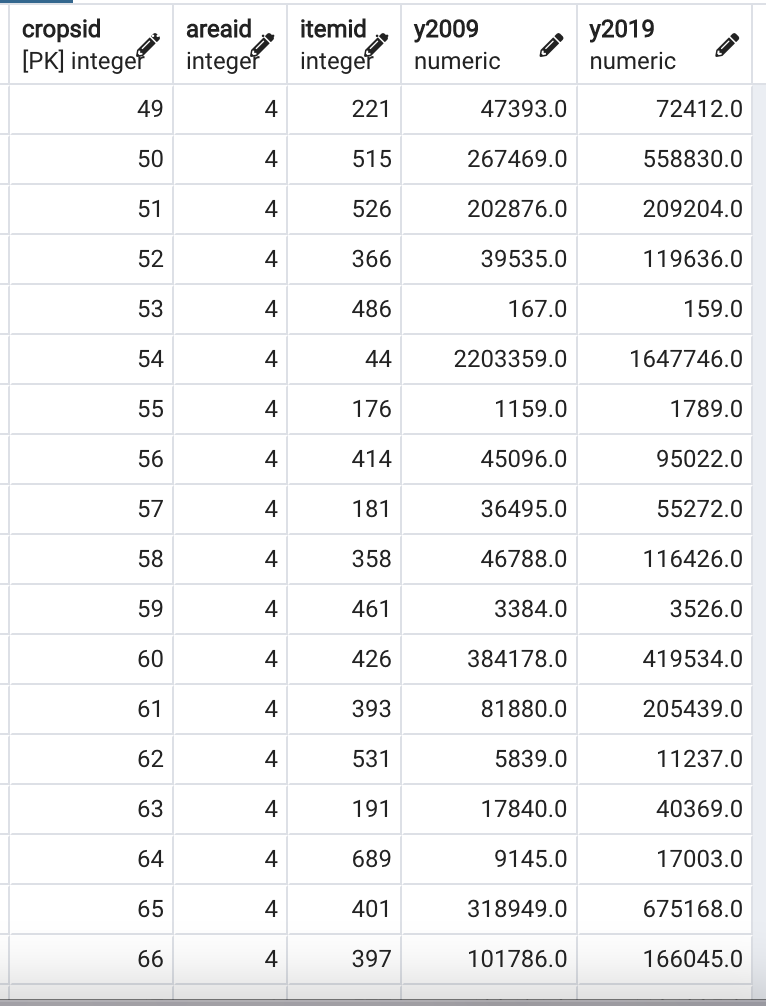



---
EXTRACT CROPS INFORMATION FROM THE DATASET



In [ ]:
query='''
SELECT area.name as "Country", item.name as "Agriculture",crops.y2009, crops.y2019
FROM crops JOIN area ON crops.areaid =  area.areaid
JOIN item ON crops.itemid= item.itemid
'''

In [ ]:
cur.execute(query)

In [ ]:
allData=cur.fetchall()

DEFINE DATAFRAME FOR DATA FROM DATABASE

In [ ]:
dic={
    'Country':[],
     'Agriculture type':[],
     'Y2009':[],
     'Y2019':[],
}

df_crops=pd.DataFrame(dic)

In [ ]:
for i,data in enumerate(allData):
  df_crops.loc[i]=[data[0],data[1],float(data[2]),float(data[3])]


DATAFRAME WITH DATA FROM DATABASE

In [ ]:
df_crops.head()

We can also save the dataset and upload to Github repository

In [ ]:
df_crops.to_csv('df_crops.csv')

CLOSE CONNECTION WITH DATABASE AFTER EXECUTING ALL OPERATION WITH DATABASE

In [ ]:
conn.close()



---
EDA OF CROPS DATASET


We can continue work with existing dataset or  download from Github

In case of Github when we want to upload dataset from Github

In [ ]:
df_crops=pd.read_csv('https://raw.githubusercontent.com/Gokhman07/AIM-5001/master/df_crops.csv')
del df_crops['Unnamed: 0']

In [ ]:
df_crops.head()

,Country,Agriculture type,Y2009,Y2019
0,algeria,"almonds, with shell",47393.0,72412.0
1,algeria,apples,267469.0,558830.0
2,algeria,apricots,202876.0,209204.0
3,algeria,artichokes,39535.0,119636.0
4,algeria,bananas,167.0,159.0


contry - name of country - categorical ordinal, string.

2010_population - number of population in 2010 year - floating point numeric, float. 

2020_population - number of population in 2020 year - floating point numeric, float.

Dataset provides the next cases:
*   contry - name of country - categorical ordinal, string.
*   agriculture type - type of agriculturev - categorical ordinal, string.
*   Y2009 - tonnes of crops in 2009 year - floating point numer, float.
*   Y2019 - tonnes of crops in 2019 year - floating point numer, float.








---


Analysis of attribute 'Country'

We are going to use Bar diagram for the analysis.

In [ ]:
df_crops['Country'].value_counts()

china, mainland     131
mexico              123
turkey              111
peru                107
morocco             105
                   ... 
iceland               9
nauru                 8
marshall islands      4
faroe islands         2
china, macao sar      1
Name: Country, Length: 197, dtype: int64

Occuncies in the dataset mean count of agriculture types that country produces.

We are going to visualise leaders of agriculture types.

In [ ]:
country_count=df_crops['Country'].value_counts()

List of country counts >90

In [ ]:
country_count_90=country_count[df_crops['Country'].value_counts()>90]

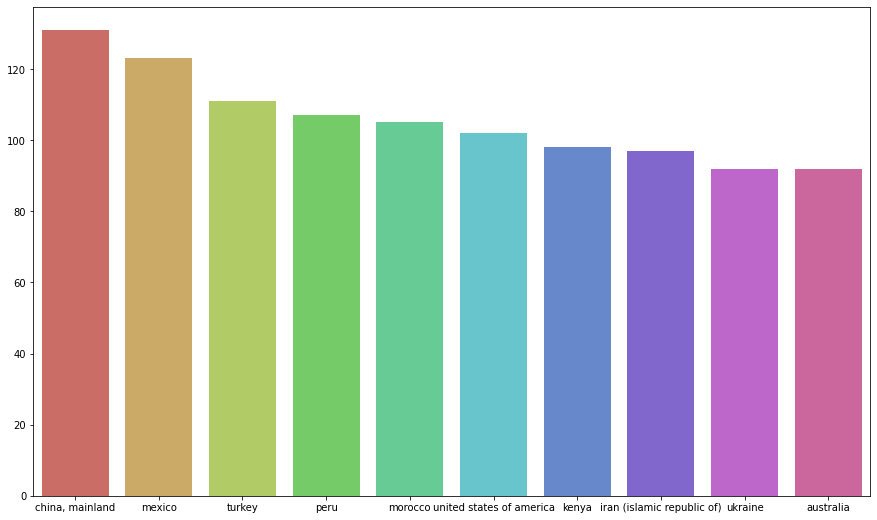

In [ ]:
fig, ax = plt.subplots(figsize=(15,9))
sns.barplot(x=country_count_90.index, y=country_count_90.values,palette = 'hls')


From plot we can see the world leaders in production of different countries:


*   China, mainland
*   Mexico
*   Turkey
*   Peru
*   Morocco
*   United states of America
*   Kenya
*   Ukraine
*   Iran
*   Australia





---
Analysis of attribute 'Agriculture type'



We are going to use Bar diagram for the analysis.

In [ ]:
df_crops['Agriculture type'].value_counts()

fruit primary              193
roots and tubers, total    193
vegetables primary         192
oilcrops                   186
vegetables, fresh nes      186
                          ... 
kapok fruit                  2
fruit, pome nes              2
cassava leaves               1
jojoba seed                  1
tallowtree seed              1
Name: Agriculture type, Length: 174, dtype: int64

We are going to present the most spreaded and the rarest agriculture types.

The most spreaded agriculture types -we choose with more than 180 occurencies

In [ ]:
typesCount=df_crops['Agriculture type'].value_counts()

In [ ]:
spreadedType=typesCount[df_crops['Agriculture type'].value_counts()>180]

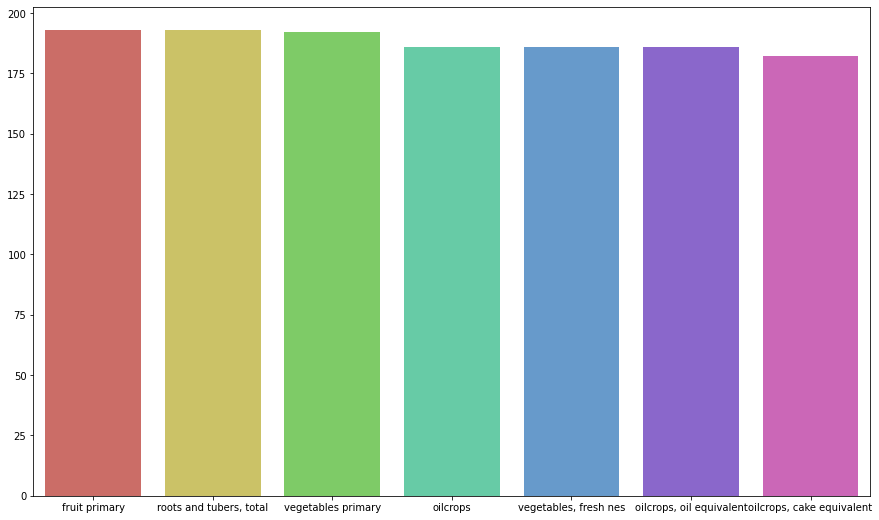

In [ ]:
fig, ax = plt.subplots(figsize=(15,9))
sns.barplot(x=spreadedType.index, y=spreadedType.values,palette = 'hls')


We can see the spreadest agriculture type:


*   fruit primary
*   roots and tubers, total
*   vegetables primary
*   oilcrops
*   vegetable, fresh nes
*   oilcrops, oil equivalentoilcrops
*   cake equivalent


The most rares agriculture types -we choose with less than 10 occurencies

In [ ]:
rareType=typesCount[df_crops['Agriculture type'].value_counts()<5]

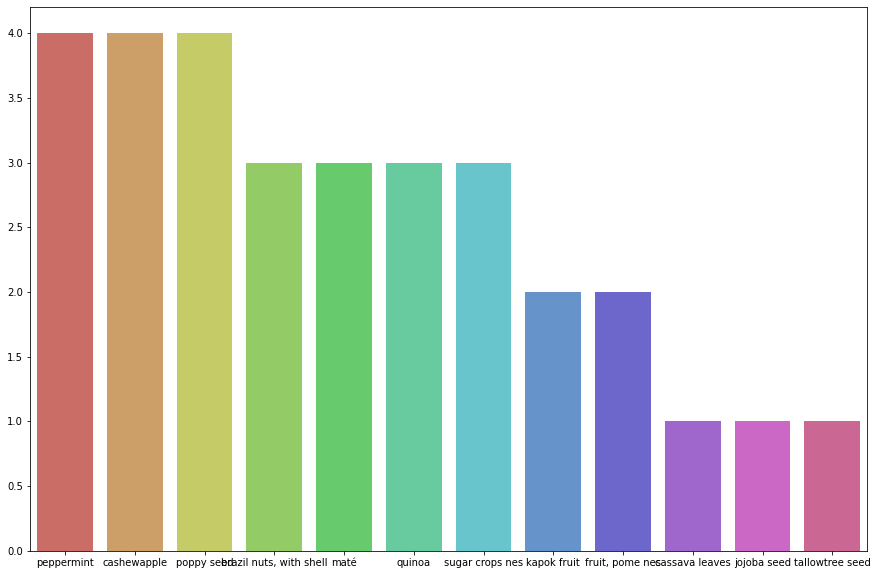

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(x=rareType.index, y=rareType.values,palette = 'hls')


The rarest agricultute types:

In [ ]:
rareType.index

Index(['peppermint', 'cashewapple', 'poppy seed', 'brazil nuts, with shell',
       'maté', 'quinoa', 'sugar crops nes', 'kapok fruit', 'fruit, pome nes',
       'cassava leaves', 'jojoba seed', 'tallowtree seed'],
      dtype='object')



---


Analysis of attribute 'y2009'

We should convert attribute values to numeric format.

In [ ]:
df_crops['Y2009']=pd.to_numeric(df_crops['Y2009'])

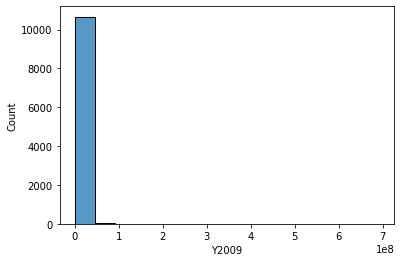

In [ ]:
sns.histplot(data=df_crops,x='Y2009',bins=15)

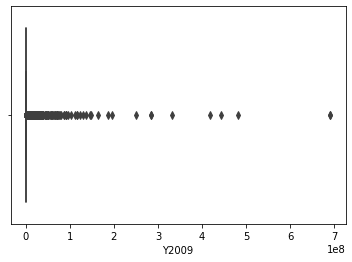

In [ ]:
sns.boxplot(data=df_crops,x='Y2009')



---


Analysis of attribute 'y2019'
We should convert attribute values to numeric format.


In [ ]:
df_crops['Y2019']=pd.to_numeric(df_crops['Y2019'])

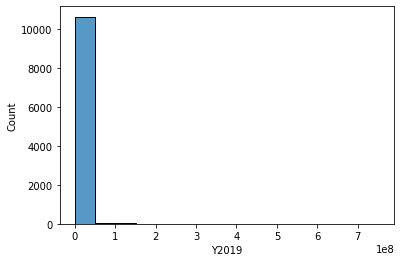

In [ ]:
sns.histplot(data=df_crops,x='Y2019',bins=15)

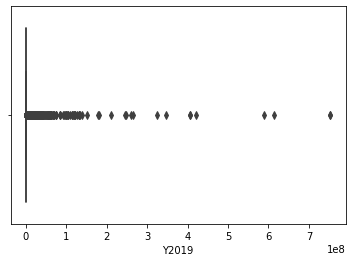

In [ ]:
sns.boxplot(data=df_crops,x='Y2019')

The most part of our data in 2009 and 2019 less than 0.5*1e8 and also we have amount of outliers.

In 2019 year in some countries crops production exceeded 1e8 tonnes.



---
The nex step we are going to explore agriculture types with the biggest total amount.


Dataframe without countries

In [ ]:
df_crop_byitem=df_crops.drop(['Country'],axis=1)

In [ ]:
df_crop_byitem.head()

,Agriculture type,Y2009,Y2019
0,"almonds, with shell",47393.0,72412.0
1,apples,267469.0,558830.0
2,apricots,202876.0,209204.0
3,artichokes,39535.0,119636.0
4,bananas,167.0,159.0


We are going to check agriculture types  with the biggest amount of production in the world in 2009 year.

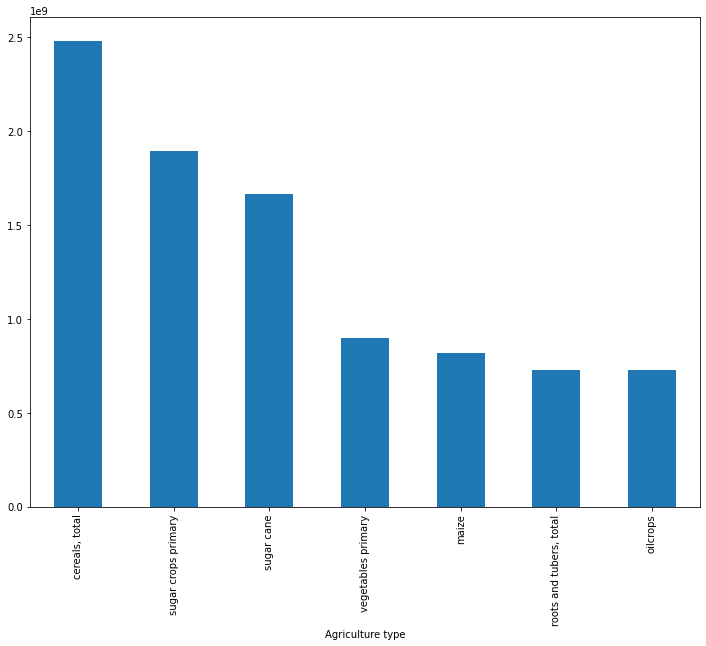

In [ ]:
df_crop_byitem.groupby('Agriculture type').sum()['Y2009'].sort_values(ascending=False)[:7].plot.bar(figsize=(12, 9))

In [ ]:
df_crop_byitem.groupby('Agriculture type').sum()['Y2009'].sort_values(ascending=False)[:7]

Agriculture type
cereals, total             2.481904e+09
sugar crops primary        1.894317e+09
sugar cane                 1.665426e+09
vegetables primary         8.974342e+08
maize                      8.207537e+08
roots and tubers, total    7.267179e+08
oilcrops                   7.266114e+08
Name: Y2009, dtype: float64

We are going to check agriculture types with the smallest amount of production in the world in 2009 year.

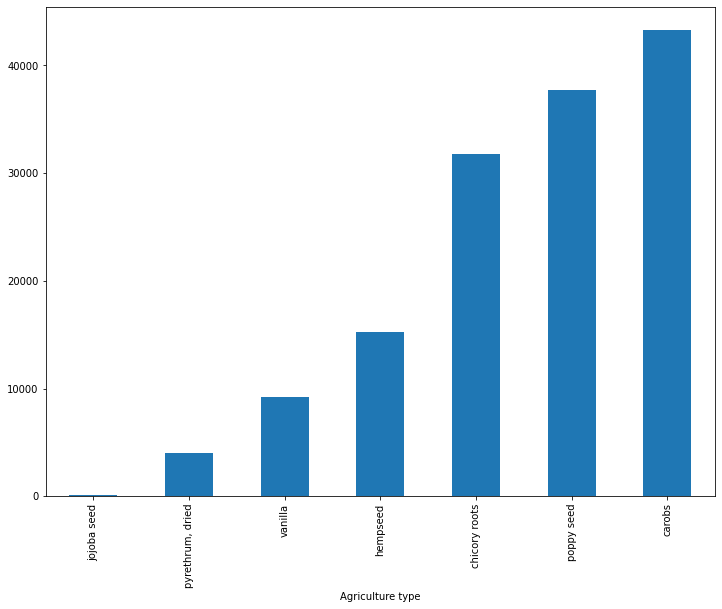

In [ ]:
df_crop_byitem.groupby('Agriculture type').sum()['Y2009'].sort_values(ascending=True)[:7].plot.bar(figsize=(12, 9))

In [ ]:
df_crop_byitem.groupby('Agriculture type').sum()['Y2009'].sort_values(ascending=True)[:7]

Agriculture type
jojoba seed           149.0
pyrethrum, dried     4000.0
vanilla              9176.0
hempseed            15259.0
chicory roots       31793.0
poppy seed          37698.0
carobs              43274.0
Name: Y2009, dtype: float64

We are going to check agriculture types with the biggest amount of production in the world in 2019 year.

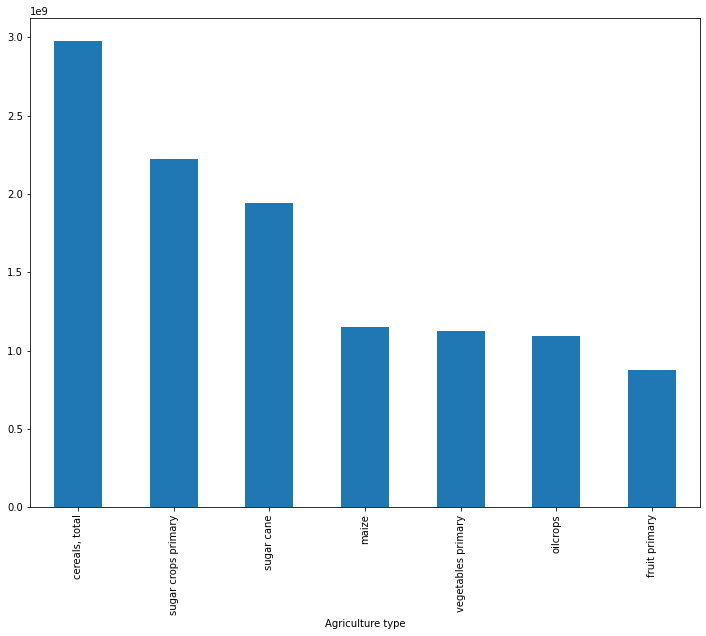

In [ ]:
df_crop_byitem.groupby('Agriculture type').sum()['Y2019'].sort_values(ascending=False)[:7].plot.bar(figsize=(12, 9))

In [ ]:
df_crop_byitem.groupby('Agriculture type').sum()['Y2019'].sort_values(ascending=False)[:7]

Agriculture type
cereals, total         2.972526e+09
sugar crops primary    2.223252e+09
sugar cane             1.943861e+09
maize                  1.148307e+09
vegetables primary     1.125559e+09
oilcrops               1.096432e+09
fruit primary          8.795125e+08
Name: Y2019, dtype: float64

As we can see there are some little change in 10 years, for example  fruit primary type increased amount of crops in the world.

We are going to check in 2019 agriculture types with the smallest amount of production in the world.

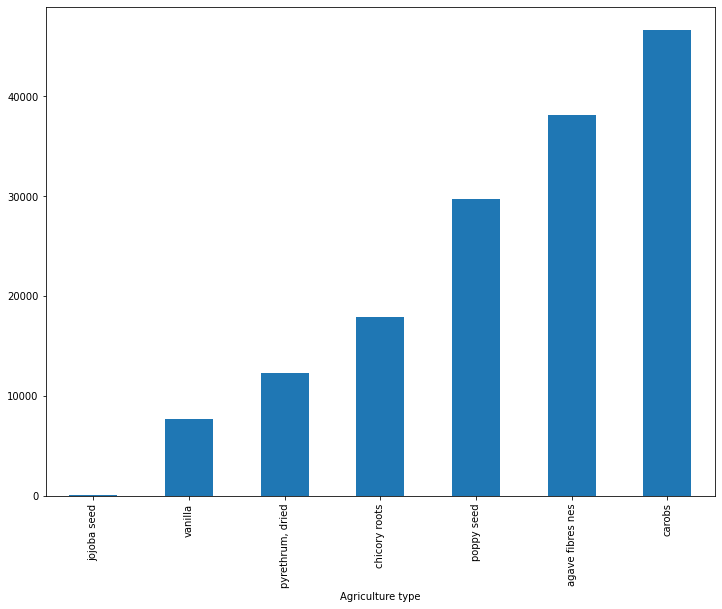

In [ ]:
df_crop_byitem.groupby('Agriculture type').sum()['Y2019'].sort_values(ascending=True)[:7].plot.bar(figsize=(12, 9))

Afte compariosn with the plot  from 2009 year we can conclude that in some categories amount increased or and in another decreased.

# DATA PREPARATION

##DATA PREPARATION of 'Total population' dataset

As feature engineering we are going to add the next columns to 'Total population' dataset

* populaton_change - change population from 2010 - 2020
* population_percent_change  - percent change population from 2010-2020

In [ ]:
df_population.head()

,country,2010_population,2020_population
0,afghanistan,29185511,38928341.0
1,albania,2913021,2837849.0
2,algeria,35977451,43851043.0
3,american samoa,56084,55197.0
4,andorra,84454,77265.0




---


ADDING POPULATION CHANGE FEATURE

In [ ]:
df_population['populaton_change']=df_population['2020_population']-df_population['2010_population']

In [ ]:
df_population.head()

,country,2010_population,2020_population,populaton_change
0,afghanistan,29185511,38928341.0,9742830.0
1,albania,2913021,2837849.0,-75172.0
2,algeria,35977451,43851043.0,7873592.0
3,american samoa,56084,55197.0,-887.0
4,andorra,84454,77265.0,-7189.0


As we can see in some countries population increased and in another decreased.
We are going to build some plots for better explanation.

Histogram plot

In [ ]:
df_population['populaton_change'].describe()

count    2.130000e+02
mean     3.947446e+06
std      1.264524e+07
min     -3.861884e+06
25%      9.537000e+03
50%      5.583900e+05
75%      2.923944e+06
max      1.457232e+08
Name: populaton_change, dtype: float64

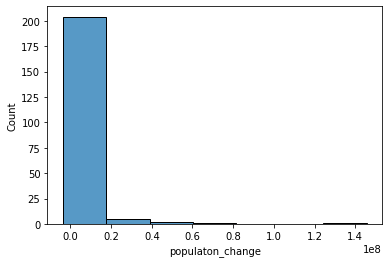

In [ ]:
sns.histplot(data=df_population,x='populaton_change',bins=7)

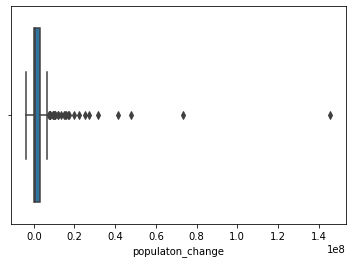

In [ ]:
sns.boxplot(data=df_population,x='populaton_change')

As we can see in the most cases country population is increasing.



---


ADDING PERCENT POPULATION CHANGE FEATURE

In [ ]:
df_population['populaton_change']

0      9742830.0
1       -75172.0
2      7873592.0
3         -887.0
4        -7189.0
         ...    
209       2441.0
210      -2067.0
211    6671114.0
212    4777970.0
213    2165199.0
Name: populaton_change, Length: 214, dtype: float64

In [ ]:
df_population['population_percent_change']=df_population['populaton_change']/df_population['2010_population']

In [ ]:
df_population.head()

,country,2010_population,2020_population,populaton_change,population_percent_change
0,afghanistan,29185511,38928341.0,9742830.0,0.333824
1,albania,2913021,2837849.0,-75172.0,-0.025806
2,algeria,35977451,43851043.0,7873592.0,0.218848
3,american samoa,56084,55197.0,-887.0,-0.015816
4,andorra,84454,77265.0,-7189.0,-0.085123


In [ ]:
df_population['population_percent_change'].describe()

count    213.000000
mean       0.142703
std        0.139277
min       -0.180778
25%        0.046053
50%        0.118063
75%        0.236502
max        0.679017
Name: population_percent_change, dtype: float64

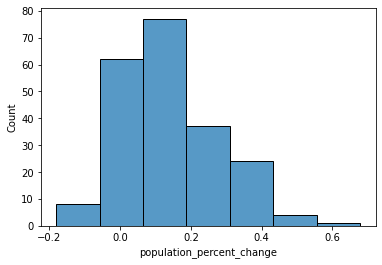

In [ ]:
sns.histplot(data=df_population,x='population_percent_change',bins=7)

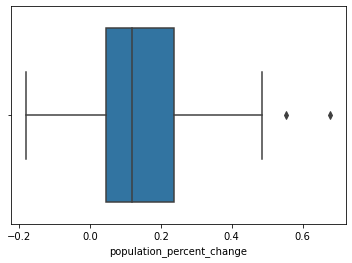

In [ ]:
sns.boxplot(data=df_population,x='population_percent_change')

As we can see in the most cases number of population increases on 20 percents.
In little amount of cases  it is decreased on 20 percents for some countries.

For better understanding we can present data in wide format.

In [ ]:
df_population[['country','population_percent_change']].transpose()

,0,1,2,3,4,5,6,7,8,9,...,204,205,206,207,208,209,210,211,212,213
country,afghanistan,albania,algeria,american samoa,andorra,angola,antigua and barbuda,argentina,armenia,aruba,...,uruguay,uzbekistan,vanuatu,"venezuela, rb",vietnam,british virgin islands,virgin islands (u.s.),"yemen, rep.",zambia,zimbabwe
population_percent_change,0.333824,-0.025806,0.218848,-0.015816,-0.085123,0.407172,0.112439,0.11249,0.029861,0.050175,...,0.034071,0.1985,0.300293,-0.000141,0.106527,0.087818,-0.019076,0.288109,0.351167,0.170519


In the nest next step of this work we are going to research what and how agricultures impact on this percent.





##DATA PREPARATION of 'Crops Production' dataset

As feature engineering we are going to add the next columns to 'Total population' dataset:

* production_change - change population from 2010 - 2020
* production_percent_change - percent change population from 2010-2020

In [ ]:
df_crops.head()

,Country,Agriculture type,Y2009,Y2019
0,algeria,"almonds, with shell",47393.0,72412.0
1,algeria,apples,267469.0,558830.0
2,algeria,apricots,202876.0,209204.0
3,algeria,artichokes,39535.0,119636.0
4,algeria,bananas,167.0,159.0


At fisrt we need to delete rows about coutries that not are in dataset of population observation.

In [ ]:
#save copy of original dataset copy
df_originaL_crops=df_crops.copy()

In [ ]:
df_crops=df_originaL_crops.copy()

Rows before operation

In [ ]:
len(df_crops)

10724

In [ ]:
for country in df_crops['Country']:
  if country not in df_population['country'].values:
    df_crops.drop(df_crops[df_crops['Country']==country].index,inplace=True)



Rows after operation

In [ ]:
len(df_crops)

8796

In [ ]:
df_crops.head()

,Country,Agriculture type,Y2009,Y2019
0,algeria,"almonds, with shell",47393.0,72412.0
1,algeria,apples,267469.0,558830.0
2,algeria,apricots,202876.0,209204.0
3,algeria,artichokes,39535.0,119636.0
4,algeria,bananas,167.0,159.0




---


ADDING POPULATION CHANGE FEATURE

In [ ]:
df_crops['crops_change']=df_crops['Y2019']-df_crops['Y2009']

In [ ]:
df_crops.head()

,Country,Agriculture type,Y2009,Y2019,crops_change
0,algeria,"almonds, with shell",47393.0,72412.0,25019.0
1,algeria,apples,267469.0,558830.0,291361.0
2,algeria,apricots,202876.0,209204.0,6328.0
3,algeria,artichokes,39535.0,119636.0,80101.0
4,algeria,bananas,167.0,159.0,-8.0


For better understanding we are going to build some plots

In [ ]:
df_crops['crops_change'].describe()

count    8.796000e+03
mean     3.142259e+05
std      4.001921e+06
min     -9.307186e+06
25%     -1.200000e+03
50%      4.205000e+02
75%      2.291300e+04
max      1.556331e+08
Name: crops_change, dtype: float64

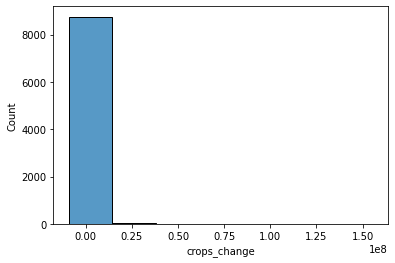

In [ ]:
sns.histplot(data=df_crops,x='crops_change',bins=7)

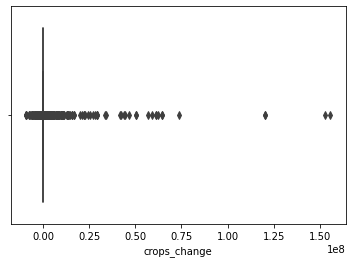

In [ ]:
sns.boxplot(data=df_crops,x='crops_change')

In the most  types of agriculture crops increse from 0.01*1e8 to 1.5 * 1e8



---
ADDING POPULATION PERCENT CHANGE FEATURE



In [ ]:
df_crops['crops_percent_change']=df_crops['crops_change']/df_crops['Y2009']

In [ ]:
df_crops.head()

,Country,Agriculture type,Y2009,Y2019,crops_change,crops_percent_change
0,algeria,"almonds, with shell",47393.0,72412.0,25019.0,0.527905
1,algeria,apples,267469.0,558830.0,291361.0,1.089326
2,algeria,apricots,202876.0,209204.0,6328.0,0.031191
3,algeria,artichokes,39535.0,119636.0,80101.0,2.026078
4,algeria,bananas,167.0,159.0,-8.0,-0.047904


For better understanding we are going to build some plots

In [ ]:
df_crops['crops_percent_change'].describe()

count    8734.000000
mean             inf
std              NaN
min        -1.000000
25%        -0.157116
50%         0.118349
75%         0.510000
max              inf
Name: crops_percent_change, dtype: float64

We have 'inf' we could get it also if some agriculture type we had zero in 2009  year.
We will delete this rows, because for future steps in research some percent value.

In [ ]:
df_crops.drop(df_crops[df_crops['crops_percent_change']==float('inf')].index,inplace=True)

In [ ]:
df_crops['crops_percent_change'].describe()

count    8706.000000
mean        1.514463
std        30.094475
min        -1.000000
25%        -0.158519
50%         0.117073
75%         0.503603
max      2504.000000
Name: crops_percent_change, dtype: float64

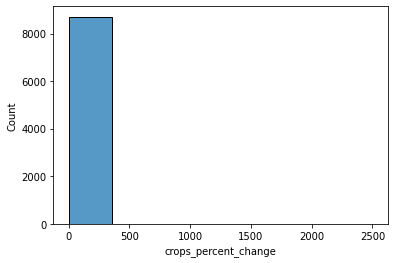

In [ ]:
sns.histplot(data=df_crops,x='crops_percent_change',bins=7)

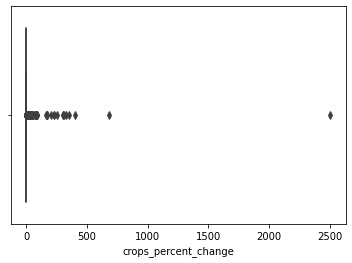

In [ ]:
sns.boxplot(data=df_crops,x='crops_percent_change')

As we can see almost each percent change is near 5%.
But we have some outliers, that reprents , that some agriculture types have a big amount increase.

But for next analysis steps we do not need the biggest outliers in our data.

In [ ]:
df_crops.drop(df_crops[df_crops['crops_percent_change']>10].index,inplace=True)

In [ ]:
len(df_crops)

8628

In [ ]:
df_crops['crops_percent_change'].describe()

count    8566.000000
mean        0.347185
std         1.104686
min        -1.000000
25%        -0.164046
50%         0.107468
75%         0.473677
max         9.977242
Name: crops_percent_change, dtype: float64

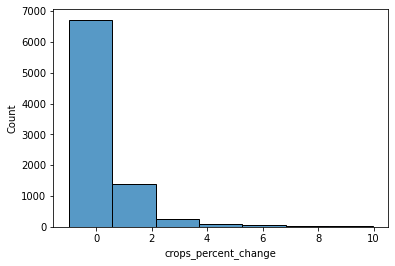

In [ ]:
sns.histplot(data=df_crops,x='crops_percent_change',bins=7)

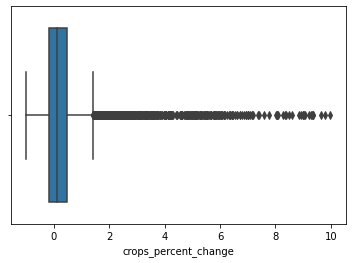

In [ ]:
sns.boxplot(data=df_crops,x='crops_percent_change')

After the operation our plots become more clear than we saw them before.

General part of the dataset has decreased in crops amount on 60% and another part increase on 40%. Some agriculture types have enormous growth in crops amount.

# Prepped Data Review 

As result after EDA and Data Preparation we got the next datasets:

Dataset describes population countries all over the world.
For our research we choose information from 2010-2020 years to observe growth population in 10 years.
Ater some operation we got features that describe population change: 'populaton_change' and 'population_percent_change'.

For the next stages of our research we are more interested in 'population_percent_change' - it makes more clear how number of population is changed.

In [ ]:
df_population.head()

,country,2010_population,2020_population,populaton_change,population_percent_change
0,afghanistan,29185511,38928341.0,9742830.0,0.333824
1,albania,2913021,2837849.0,-75172.0,-0.025806
2,algeria,35977451,43851043.0,7873592.0,0.218848
3,american samoa,56084,55197.0,-887.0,-0.015816
4,andorra,84454,77265.0,-7189.0,-0.085123


DEFINE DATASET WITH DATA THAT WE NEED IN THE NEXT STAGES

In [ ]:
df_population_change=df_population[['country','population_percent_change']]
df_population_change.head()

,country,population_percent_change
0,afghanistan,0.333824
1,albania,-0.025806
2,algeria,0.218848
3,american samoa,-0.015816
4,andorra,-0.085123


Plots that describe population percent change.

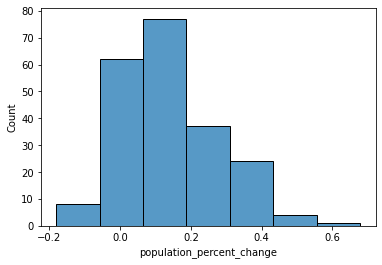

In [ ]:
sns.histplot(data=df_population,x='population_percent_change',bins=7)

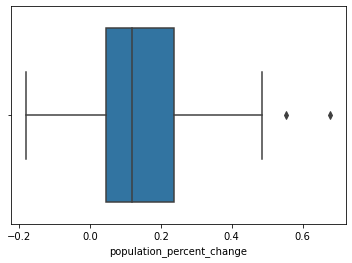

In [ ]:
sns.boxplot(data=df_population,x='population_percent_change')

The second dataset, that we defined id 'Props Production'.

It describes props production (for different agriculture types) for countries
all over the word.

We choose for 2009 and 2019 year, because we consider props production from last yeat has impact on population number in the current year.

 Ater some operations we got features that describe population change: 'crops_change' and 'crops_percent_change'.

For the next stages of our research we are more interested in 'crops_percent_change' - it makes more clear how number of crops is changed.



In [ ]:
df_crops.head()

,Country,Agriculture type,Y2009,Y2019,crops_change,crops_percent_change
0,algeria,"almonds, with shell",47393.0,72412.0,25019.0,0.527905
1,algeria,apples,267469.0,558830.0,291361.0,1.089326
2,algeria,apricots,202876.0,209204.0,6328.0,0.031191
3,algeria,artichokes,39535.0,119636.0,80101.0,2.026078
4,algeria,bananas,167.0,159.0,-8.0,-0.047904


DEFINE DATASET WITH THAT WE NEED IN THE NEXT STAGES

In [ ]:
df_crops_change=df_crops[['Country','Agriculture type','crops_percent_change']]
df_crops_change.head()

,Country,Agriculture type,crops_percent_change
0,algeria,"almonds, with shell",0.527905
1,algeria,apples,1.089326
2,algeria,apricots,0.031191
3,algeria,artichokes,2.026078
4,algeria,bananas,-0.047904


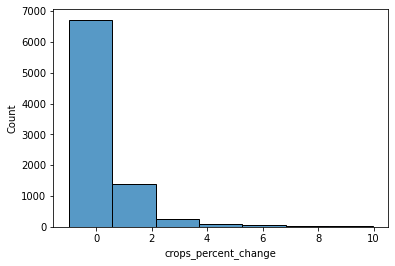

In [ ]:
sns.histplot(data=df_crops,x='crops_percent_change',bins=7)

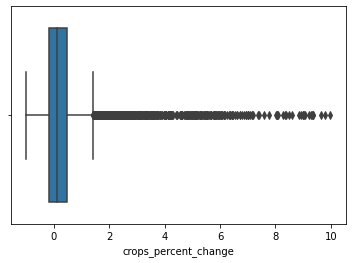

In [ ]:
sns.boxplot(data=df_crops,x='crops_percent_change')

# Investigative Analysis & Results

In this chapter we are going to train Linear regression on our data.

As the first stage we should provide transformation for the dataset that describes crops transformation. (from long to wide format)

But before this step we should delete agriculture type that have a little amount of occrunces - have the least impact.

In [ ]:
type_counts=df_crops_change['Agriculture type'].value_counts()

In [ ]:
type_counts.describe()

count    172.000000
mean      50.162791
std       40.663750
min        1.000000
25%       17.000000
50%       43.000000
75%       75.250000
max      160.000000
Name: Agriculture type, dtype: float64

We will drop rows with agriculture types with less than 10 occurrencies

In [ ]:
uselessTypes=type_counts[type_counts<10].index

In [ ]:
uselessTypes

Index(['hemp tow waste', 'agave fibres nes', 'melonseed', 'fonio',
       'cinnamon (cannella)', 'carobs', 'canary seed', 'cranberries', 'cloves',
       'manila fibre (abaca)', 'karite nuts (sheanuts)', 'coir',
       'pyrethrum, dried', 'tung nuts', 'bambara beans', 'kola nuts',
       'cashewapple', 'gooseberries', 'maté', 'peppermint', 'hempseed',
       'sugar crops nes', 'brazil nuts, with shell', 'ramie', 'quinoa',
       'kapok fruit', 'fruit, pome nes', 'poppy seed', 'jojoba seed'],
      dtype='object')

Shape of dataset before operation

In [ ]:
df_crops_change.shape

(8228, 5)

Save copy of dataset

In [ ]:
df_crops_change_copy=df_crops_change.copy()

In [ ]:
df_crops_change.reset_index(inplace=True)

In [ ]:
for i in range(len(df_crops_change)):
  if df_crops_change['Agriculture type'][i] in uselessTypes:
         df_crops_change.drop(i,inplace=True)


/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Shape after operation

In [ ]:
df_crops_change.shape

(8488, 4)

Number of agriculture types

In [ ]:
df_crops_change['Agriculture type'].value_counts().describe()

count    143.000000
mean      59.356643
std       38.539061
min       10.000000
25%       29.500000
50%       51.000000
75%       79.500000
max      160.000000
Name: Agriculture type, dtype: float64

We reduced 30 agriculture type

After the operation we can make transofrmatiom of our dataset

In this transformation we can view the next things:

indices - countries

columns - agriculture type

values - crops percent change

As result we have for each country own view by agriculture types

In [ ]:
df_crops_change.pivot(index='Country',columns='Agriculture type',values='crops_percent_change')

Agriculture type,"almonds, with shell","anise, badian, fennel, coriander",apples,apricots,areca nuts,artichokes,asparagus,avocados,bananas,barley,...,vanilla,vegetables primary,"vegetables, fresh nes","vegetables, leguminous nes",vetches,"walnuts, with shell",watermelons,wheat,yams,yautia (cocoyam)
Country,,,,,,,,,,,,,,,,,,,,,
afghanistan,-0.115277,0.728289,2.440170,1.156050,NaN,NaN,NaN,NaN,NaN,-0.745728,...,NaN,0.347435,0.494362,NaN,NaN,0.468706,2.387960,-0.034360,NaN,NaN
albania,NaN,NaN,1.244248,0.266234,NaN,NaN,NaN,NaN,NaN,0.764889,...,NaN,0.849624,0.433447,-0.089109,0.095588,NaN,0.328849,-0.299856,NaN,NaN
algeria,0.527905,NaN,1.089326,0.031191,NaN,2.026078,NaN,NaN,-0.047904,-0.252166,...,NaN,0.951363,2.075504,-0.064170,-0.059524,NaN,1.132811,0.312808,NaN,NaN
angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.033463,NaN,...,NaN,0.185759,0.244417,NaN,NaN,NaN,NaN,-0.425500,NaN,NaN
antigua and barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.210526,NaN,...,NaN,0.109518,-0.105505,NaN,NaN,NaN,NaN,NaN,0.609524,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
uruguay,NaN,NaN,-0.279932,NaN,NaN,NaN,NaN,NaN,NaN,0.374359,...,NaN,0.103789,0.278227,NaN,NaN,NaN,-0.076640,-0.463659,NaN,NaN
uzbekistan,0.186271,NaN,0.770106,0.837479,NaN,0.791200,NaN,NaN,NaN,-0.430721,...,NaN,0.748439,1.217235,1.460000,NaN,2.618571,0.150434,-0.082282,NaN,NaN
vanuatu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.055000,NaN,...,NaN,0.160488,0.160488,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Im some columns we have null values, means country produces nothing in the category.

We will replace null values by '0'.

In [ ]:
df_crops_view=df_crops_change.pivot(index='Country',columns='Agriculture type',values='crops_percent_change').fillna(0)

In [ ]:
df_crops_view.head()

Agriculture type,"almonds, with shell","anise, badian, fennel, coriander",apples,apricots,areca nuts,artichokes,asparagus,avocados,bananas,barley,...,vanilla,vegetables primary,"vegetables, fresh nes","vegetables, leguminous nes",vetches,"walnuts, with shell",watermelons,wheat,yams,yautia (cocoyam)
Country,,,,,,,,,,,,,,,,,,,,,
afghanistan,-0.115277,0.728289,2.440170,1.156050,0.0,0.000000,0.0,0.0,0.000000,-0.745728,...,0.0,0.347435,0.494362,0.000000,0.000000,0.468706,2.387960,-0.034360,0.000000,0.0
albania,0.000000,0.000000,1.244248,0.266234,0.0,0.000000,0.0,0.0,0.000000,0.764889,...,0.0,0.849624,0.433447,-0.089109,0.095588,0.000000,0.328849,-0.299856,0.000000,0.0
algeria,0.527905,0.000000,1.089326,0.031191,0.0,2.026078,0.0,0.0,-0.047904,-0.252166,...,0.0,0.951363,2.075504,-0.064170,-0.059524,0.000000,1.132811,0.312808,0.000000,0.0
angola,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,1.033463,0.000000,...,0.0,0.185759,0.244417,0.000000,0.000000,0.000000,0.000000,-0.425500,0.000000,0.0
antigua and barbuda,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.210526,0.000000,...,0.0,0.109518,-0.105505,0.000000,0.000000,0.000000,0.000000,0.000000,0.609524,0.0


In [ ]:
df_crops_view.tail()

Agriculture type,"almonds, with shell","anise, badian, fennel, coriander",apples,apricots,areca nuts,artichokes,asparagus,avocados,bananas,barley,...,vanilla,vegetables primary,"vegetables, fresh nes","vegetables, leguminous nes",vetches,"walnuts, with shell",watermelons,wheat,yams,yautia (cocoyam)
Country,,,,,,,,,,,,,,,,,,,,,
uruguay,0.000000,0.000000,-0.279932,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.374359,...,0.00,0.103789,0.278227,0.000000,0.0,0.000000,-0.076640,-0.463659,0.0,0.0
uzbekistan,0.186271,0.000000,0.770106,0.837479,0.0,0.791200,0.000000,0.000000,0.000000,-0.430721,...,0.00,0.748439,1.217235,1.460000,0.0,2.618571,0.150434,-0.082282,0.0,0.0
vanuatu,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.055000,0.000000,...,0.00,0.160488,0.160488,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0
zambia,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,-0.066667,1.597111,...,0.00,0.177588,0.170881,0.000000,0.0,0.000000,0.000000,-0.223099,0.0,0.0
zimbabwe,0.000000,-0.272727,-0.065303,0.095238,0.0,0.275591,0.273859,4.763347,0.472632,0.176613,...,-0.25,0.195774,0.171193,0.273403,0.0,0.000000,0.000000,5.666667,0.0,0.0


 DROP FROM DATASET POPULATIOM CONTRIES THAT NOT IN DATASET OF CROPS VIEW

Make copy of dataset

In [ ]:
df_population_change_copy=df_population_change.copy()

In [ ]:
df_population_change=df_population_change.reset_index()

In [ ]:
for i in range(len(df_population_change)):
  if df_population_change['country'][i]  not in df_crops_view.index:
      df_population_change.drop(i,inplace=True)

In [ ]:
df_population_change.head()

,index,country,population_percent_change
0,0,afghanistan,0.333824
1,1,albania,-0.025806
2,2,algeria,0.218848
5,5,angola,0.407172
6,6,antigua and barbuda,0.112439


ADDING POPULATION CHANGE AS TARGERT VALUE TO CROPS VIEW DATASET

In [ ]:
df_crops_view['population_percent_change']=df_population_change['population_percent_change'].values

In [ ]:
df_crops_view

Agriculture type,"almonds, with shell","anise, badian, fennel, coriander",apples,apricots,areca nuts,artichokes,asparagus,avocados,bananas,barley,...,vegetables primary,"vegetables, fresh nes","vegetables, leguminous nes",vetches,"walnuts, with shell",watermelons,wheat,yams,yautia (cocoyam),population_percent_change
Country,,,,,,,,,,,,,,,,,,,,,
afghanistan,-0.115277,0.728289,2.440170,1.156050,0.0,0.000000,0.000000,0.000000,0.000000,-0.745728,...,0.347435,0.494362,0.000000,0.000000,0.468706,2.387960,-0.034360,0.000000,0.0,0.333824
albania,0.000000,0.000000,1.244248,0.266234,0.0,0.000000,0.000000,0.000000,0.000000,0.764889,...,0.849624,0.433447,-0.089109,0.095588,0.000000,0.328849,-0.299856,0.000000,0.0,-0.025806
algeria,0.527905,0.000000,1.089326,0.031191,0.0,2.026078,0.000000,0.000000,-0.047904,-0.252166,...,0.951363,2.075504,-0.064170,-0.059524,0.000000,1.132811,0.312808,0.000000,0.0,0.218848
angola,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.033463,0.000000,...,0.185759,0.244417,0.000000,0.000000,0.000000,0.000000,-0.425500,0.000000,0.0,0.407172
antigua and barbuda,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.210526,0.000000,...,0.109518,-0.105505,0.000000,0.000000,0.000000,0.000000,0.000000,0.609524,0.0,0.112439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
uruguay,0.000000,0.000000,-0.279932,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.374359,...,0.103789,0.278227,0.000000,0.000000,0.000000,-0.076640,-0.463659,0.000000,0.0,0.034071
uzbekistan,0.186271,0.000000,0.770106,0.837479,0.0,0.791200,0.000000,0.000000,0.000000,-0.430721,...,0.748439,1.217235,1.460000,0.000000,2.618571,0.150434,-0.082282,0.000000,0.0,0.198500
vanuatu,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.055000,0.000000,...,0.160488,0.160488,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.300293


In [ ]:
df_crops_view.dropna(inplace=True)

SPLITTIG DATA INTO TRAINING AND TEST SETS

In [ ]:
from sklearn.model_selection  import train_test_split

In [ ]:
x=df_crops_view.iloc[:,0:-1]
y=df_crops_view.iloc[:,-1]

We split data in the next way:
Train part - 60 %
Test part  - 40%

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=0.4,
                                                  random_state=80)

Show X_train

In [ ]:
X_train.head()

Agriculture type,"almonds, with shell","anise, badian, fennel, coriander",apples,apricots,areca nuts,artichokes,asparagus,avocados,bananas,barley,...,vanilla,vegetables primary,"vegetables, fresh nes","vegetables, leguminous nes",vetches,"walnuts, with shell",watermelons,wheat,yams,yautia (cocoyam)
Country,,,,,,,,,,,,,,,,,,,,,
guyana,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0000,0.682051,0.00000,...,0.000000,3.372548,-0.548833,0.0,0.0,0.000000,0.00000,0.000000,0.374060,0.0
comoros,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0000,-0.647967,0.00000,...,-0.844444,0.155062,0.153346,0.0,0.0,0.000000,0.00000,0.000000,0.055431,0.0
nepal,0.0,0.0,-0.197986,1.652414,0.393513,0.0,0.0,0.0000,2.138921,0.31545,...,0.000000,0.521753,0.480866,0.0,0.0,0.792536,0.00000,0.492464,0.000000,0.0
sri lanka,0.0,0.0,0.000000,0.000000,0.925520,0.0,0.0,0.0000,0.000000,0.00000,...,0.000000,0.158690,0.087778,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.0
jamaica,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,-0.1681,0.206349,0.00000,...,0.000000,0.349560,0.207548,0.0,0.0,0.000000,0.30961,0.000000,0.325508,0.0


Show X_test

In [ ]:
X_test.head()

Agriculture type,"almonds, with shell","anise, badian, fennel, coriander",apples,apricots,areca nuts,artichokes,asparagus,avocados,bananas,barley,...,vanilla,vegetables primary,"vegetables, fresh nes","vegetables, leguminous nes",vetches,"walnuts, with shell",watermelons,wheat,yams,yautia (cocoyam)
Country,,,,,,,,,,,,,,,,,,,,,
argentina,0.407279,1.162532,-0.397403,0.028367,0.0,0.155005,0.399929,0.149167,0.038559,2.774335,...,0.000000,0.106393,0.330969,0.000000,0.000000,0.768341,-0.000158,1.287185,0.000000,0.000000
ethiopia,0.000000,2.309730,0.000000,0.000000,0.0,0.000000,0.000000,1.775278,1.586066,0.250992,...,0.000000,0.086866,-0.868421,1.020738,0.532595,0.000000,0.000000,0.728181,-0.878751,0.000000
cyprus,0.024096,0.000000,-0.747044,-0.090047,0.0,-0.487281,0.000000,0.000000,-0.202985,-0.241744,...,0.000000,-0.249509,-0.220696,-0.082534,0.000000,-0.108280,-0.390249,1.006127,0.000000,0.000000
brunei darussalam,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.315852,0.000000,...,0.000000,-0.393919,-0.895377,0.240922,0.000000,0.000000,1.869159,0.000000,0.000000,0.000000
mexico,-0.355932,1.534785,0.356175,-0.274569,0.0,0.650761,2.728795,0.869163,-0.002324,0.858115,...,-0.003817,0.494213,0.235970,0.134331,-0.218245,0.485635,0.336145,-0.211872,0.000000,6.083922


After our data is splitted we are going to fit Linear  Regression model.
We are going to use it from sklearn library.

In [ ]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm=lm.fit(X_train,y_train)

The coefficients are given by

In [ ]:
lm.coef_

array([-0.06305133,  0.04987288,  0.04123047, -0.02456653,  0.02893766,
        0.15842563, -0.01554755,  0.06417017, -0.02290798, -0.03488422,
       -0.05719305,  0.07700003, -0.00707881,  0.01408009, -0.0341258 ,
       -0.15414229, -0.03484569,  0.01922017,  0.04726913, -0.07313445,
       -0.00542653, -0.00194089,  0.03984764, -0.03385382,  0.19106723,
       -0.02297952,  0.00421739,  0.08141697,  0.05400654,  0.00678169,
       -0.00435886,  0.024383  ,  0.04906984, -0.00091385, -0.0222801 ,
        0.12643808,  0.10050618,  0.14673848,  0.00534545,  0.16503415,
        0.0109653 ,  0.08889035, -0.03369761, -0.09817816,  0.02417528,
        0.06049462,  0.00590421, -0.03093129, -0.03559461, -0.00247044,
       -0.03286113,  0.0089138 , -0.02385154, -0.11973308, -0.04466004,
        0.16520889, -0.05265098,  0.02878211, -0.01472965, -0.00419606,
        0.01371829,  0.01768433,  0.00695333, -0.02497915,  0.01189429,
        0.09836993, -0.03768255,  0.0604976 , -0.00648076, -0.05

The intercept is:

In [ ]:
lm.intercept_

0.1292513789871867

Check on the test data

In [ ]:
y_pred=lm.predict(X_test)

We will use MSE(mean squared error) for our result evaluation

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mean_squared_error(y_test.values,y_pred)

0.16936787593874894

RMSE (root mean squared error)

In [ ]:
np.sqrt(mean_squared_error(y_test.values,y_pred))

0.4115432856198105

RMSE values betweem 0.2 and 0.5 shows that model can relatively predict the data accurately.

# Conclusions 

[We researched question  agriculture types  impact on country population.

Data was collected from several not-related resources.

For each dataset was provided EDA. 

Feature  engineering operations were executed. Features that we got became keys for the next research steps.

After all pevious steps we fitted Linear Regression model.

As result we got model can relatively predict the data accurately and proved that agriculture types have impact on population.

Python libraries as Pandas, NumPy, Seaborn, Sickit learn are good tools to deal with analysis.](https://)